In [19]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [20]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [21]:
step_function(np.array([-10, -1, 1,2,3]))

array([0, 0, 1, 1, 1])

In [22]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)
step_function(np.array([-10, -1, 1,2,3]))

array([0, 0, 1, 1, 1])

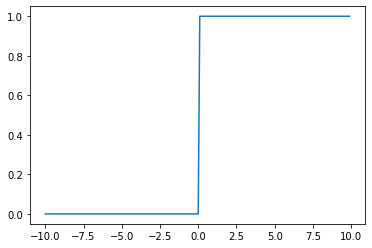

In [23]:
x = np.arange(-10, 10, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

In [26]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

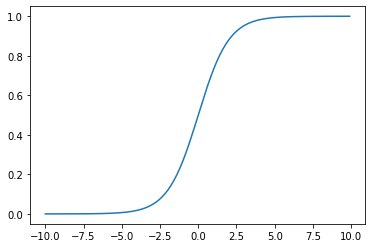

In [27]:
x = np.arange(-10, 10, 0.1)
y = sigmoid_function(x)
plt.plot(x, y)
plt.show()

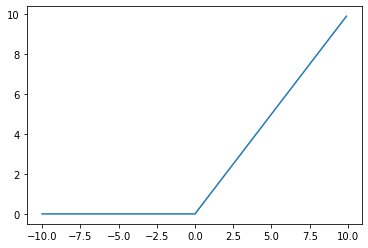

In [30]:
def relu_function(x):
    return np.maximum(x, 0)
x = np.arange(-10, 10, 0.1)
y = relu_function(x)
plt.plot(x, y)
plt.show()

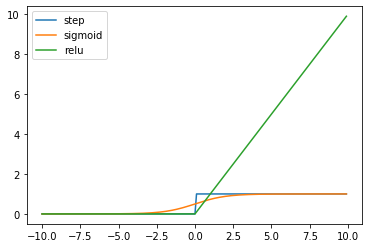

In [33]:
x = np.arange(-10, 10, 0.1)
y1 = step_function(x)
y2 = sigmoid_function(x)
y3 = relu_function(x)
plt.plot(x, y1, label='step')
plt.plot(x, y2, label='sigmoid')
plt.plot(x, y3, label='relu')
plt.legend()
plt.show()